In [4]:
import os
import pandas as pd
import numpy as np
import mpl_finance as mpf
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'mpl_finance'

In [ ]:
holc_dict = np.load('KDD/holc_500_50.npy', allow_pickle=True).item()


In [ ]:
holc_df = pd.DataFrame(holc_dict)

holc_df.head()   #reshape
#print(holc_df.shape[1]-window_len+1)
#holc_df.shape

,2007-01-15,2007-01-16,2007-01-17,2007-01-18,2007-01-19,2007-01-22,2007-01-23,2007-01-24,2007-01-25,2007-01-26,...,2021-09-14,2021-09-15,2021-09-16,2021-09-17,2021-09-22,2021-09-23,2021-09-24,2021-09-27,2021-09-28,2021-09-29
0,0.0167,0.0232,0.0101,0.0340,0.0108,0.0067,-0.0080,-0.0051,0.0051,0.0029,...,0.0085,0.0191,0.0162,0.0054,0.0214,0.0082,-0.0016,-0.0095,0.0112,0.0076
1,0.0009,-0.0059,0.0010,0.0025,0.0057,-0.0027,-0.0080,-0.0051,0.0051,0.0029,...,-0.0087,0.0018,0.0017,0.0007,0.0036,0.0055,-0.0016,-0.0095,0.0047,-0.0026
2,0.0009,-0.0068,-0.0021,-0.0011,-0.0065,-0.0094,-0.0169,-0.0245,-0.0287,-0.0291,...,-0.0088,0.0006,-0.0142,-0.0273,0.0036,-0.0055,-0.0236,-0.0477,-0.0051,-0.0260
3,0.0093,0.0198,0.0089,0.0340,0.0053,0.0059,-0.0135,-0.0092,-0.0258,-0.0261,...,0.0046,0.0178,-0.0134,-0.0176,0.0204,0.0048,-0.0218,-0.0458,0.0004,-0.0225


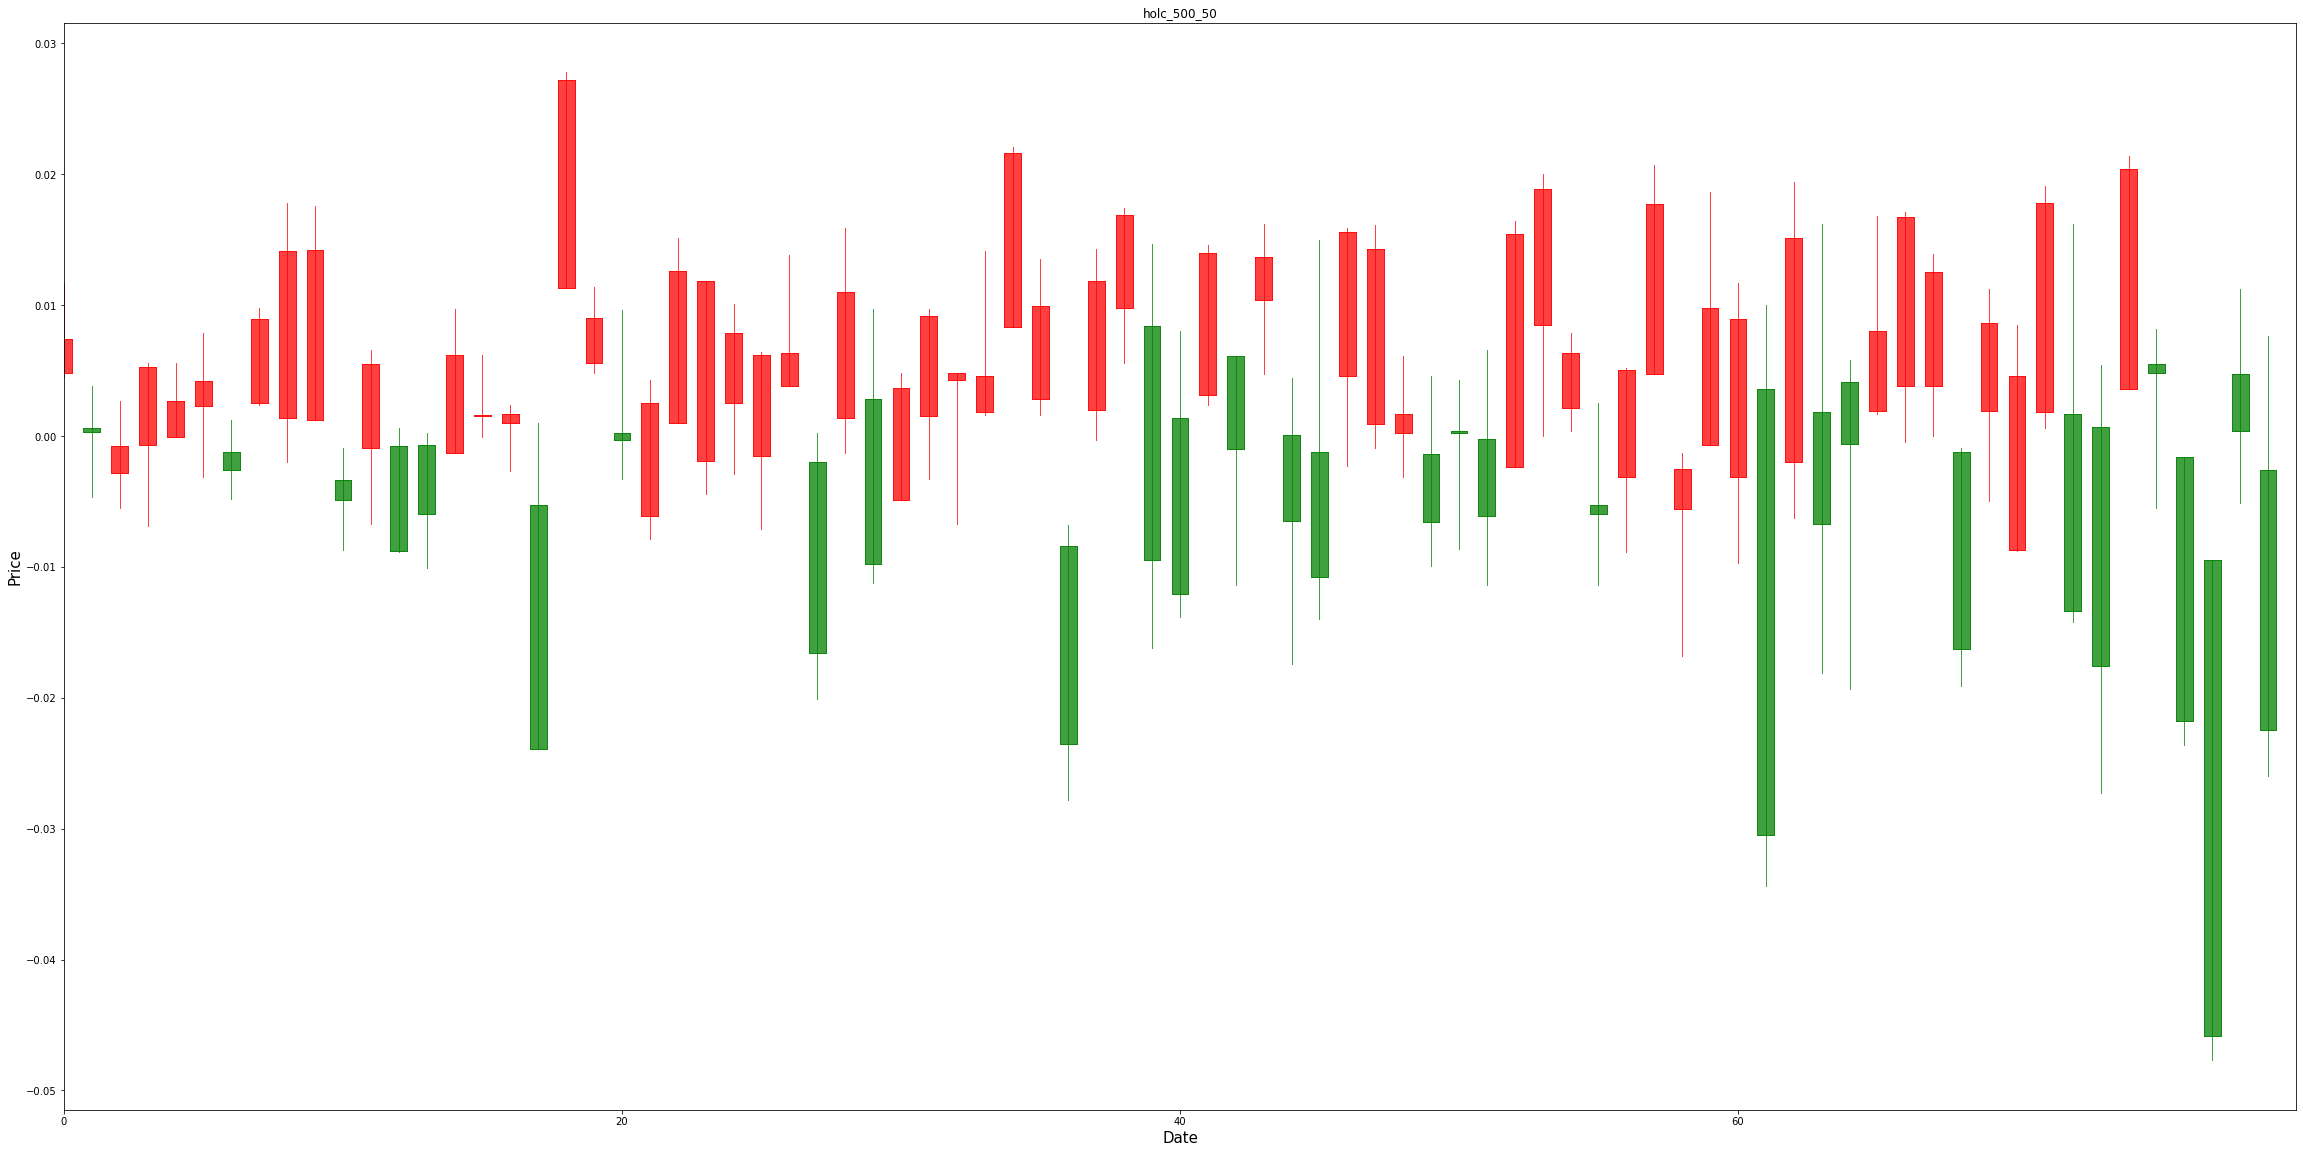

,2007-01-15,2007-01-16,2007-01-17,2007-01-18,2007-01-19,2007-01-22,2007-01-23,2007-01-24,2007-01-25,2007-01-26,...,2021-09-14,2021-09-15,2021-09-16,2021-09-17,2021-09-22,2021-09-23,2021-09-24,2021-09-27,2021-09-28,2021-09-29
0,0.0167,0.0232,0.0101,0.0340,0.0108,0.0067,-0.0080,-0.0051,0.0051,0.0029,...,0.0085,0.0191,0.0162,0.0054,0.0214,0.0082,-0.0016,-0.0095,0.0112,0.0076
1,0.0009,-0.0059,0.0010,0.0025,0.0057,-0.0027,-0.0080,-0.0051,0.0051,0.0029,...,-0.0087,0.0018,0.0017,0.0007,0.0036,0.0055,-0.0016,-0.0095,0.0047,-0.0026
2,0.0009,-0.0068,-0.0021,-0.0011,-0.0065,-0.0094,-0.0169,-0.0245,-0.0287,-0.0291,...,-0.0088,0.0006,-0.0142,-0.0273,0.0036,-0.0055,-0.0236,-0.0477,-0.0051,-0.0260
3,0.0093,0.0198,0.0089,0.0340,0.0053,0.0059,-0.0135,-0.0092,-0.0258,-0.0261,...,0.0046,0.0178,-0.0134,-0.0176,0.0204,0.0048,-0.0218,-0.0458,0.0004,-0.0225


In [ ]:
#holc_dict = np.load('/Users/tinggao/Downloads/Q_fin/holc_500_50.npy', allow_pickle=True).item()
holc_df = pd.DataFrame(holc_dict)

holc_df.head()

start = 3500

highs = holc_df.iloc[0, start:]
opens = holc_df.iloc[1, start:]
lows = holc_df.iloc[2, start:]
closes = holc_df.iloc[3, start:]
days = holc_df.shape[1]-start

ohlc = list(zip(np.arange(0, len(opens)), opens, closes, highs, lows))


fig = plt.figure(figsize=(40,20))
ax=fig.add_subplot(111)
mpf.candlestick2_ochl(ax, opens, closes, highs, lows, width=0.6, colorup='r', colordown='g')

ax.set_xlim(-1, days)
ax.set_xticks(range(0, days, 20))
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('Price', fontsize = 15)
ax.set_title('holc_500_50')
plt.show()
holc_df.head()


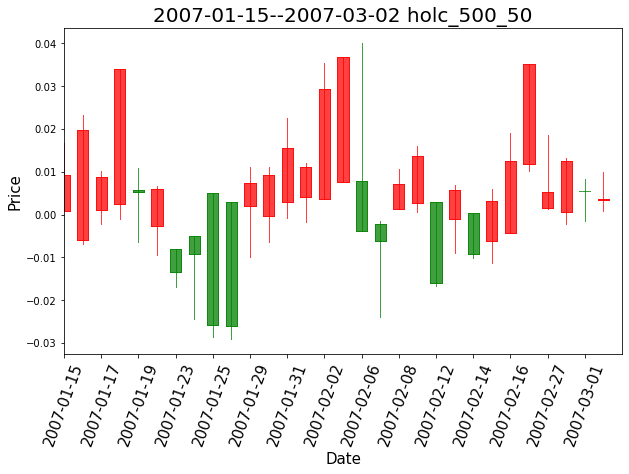

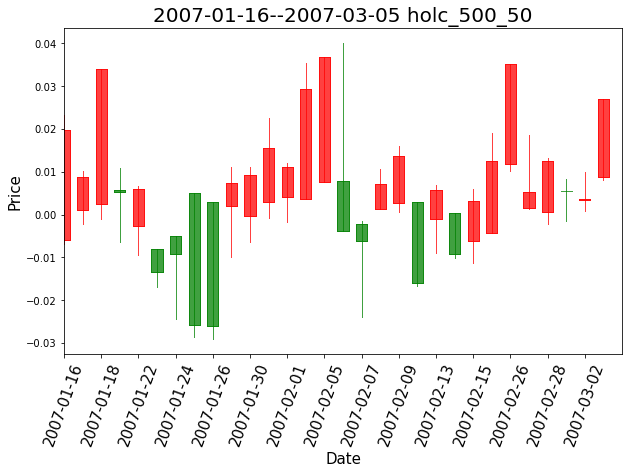

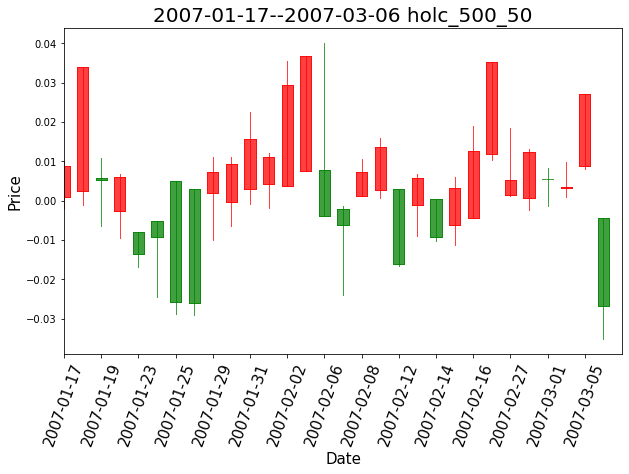

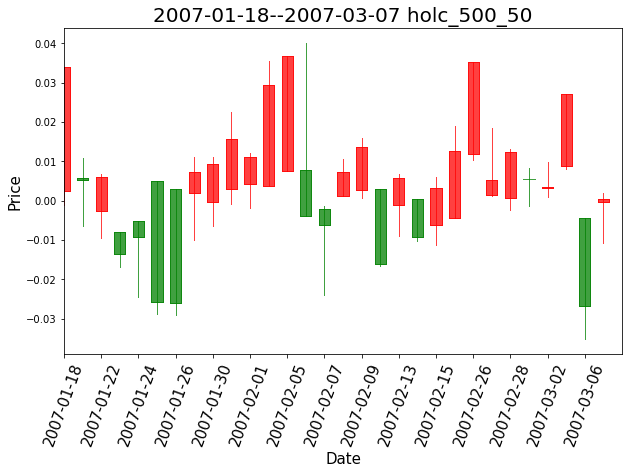

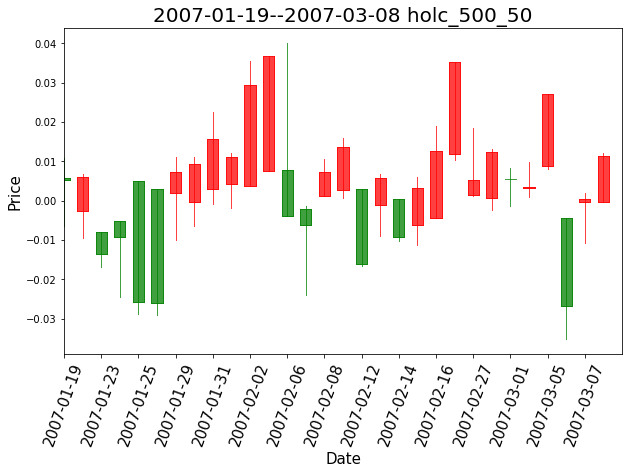

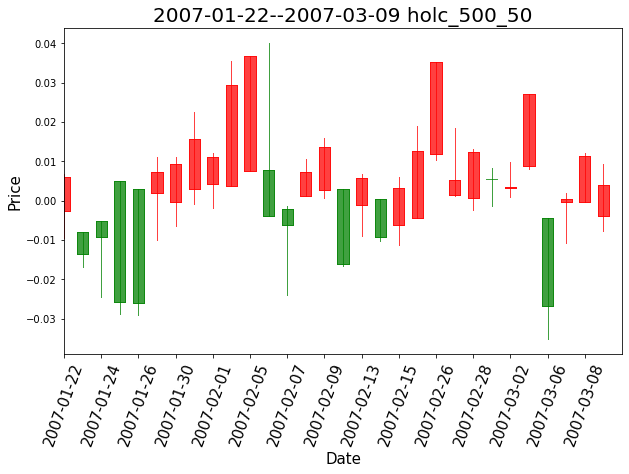

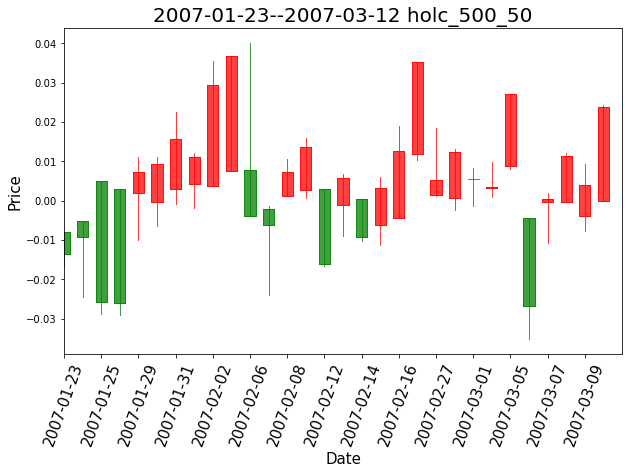

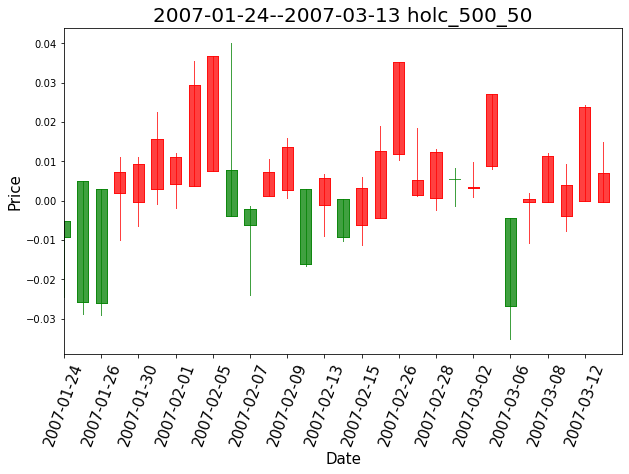

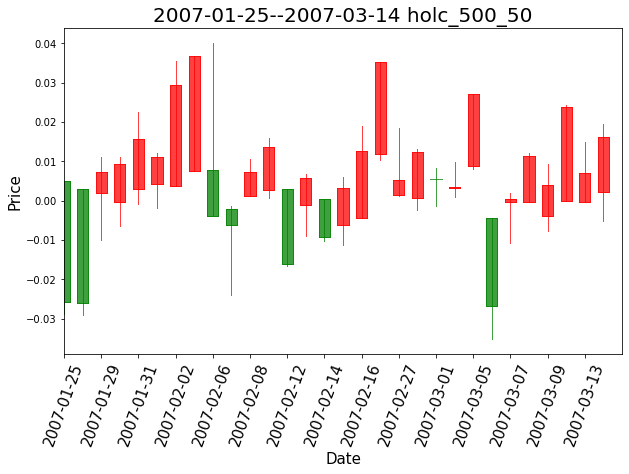

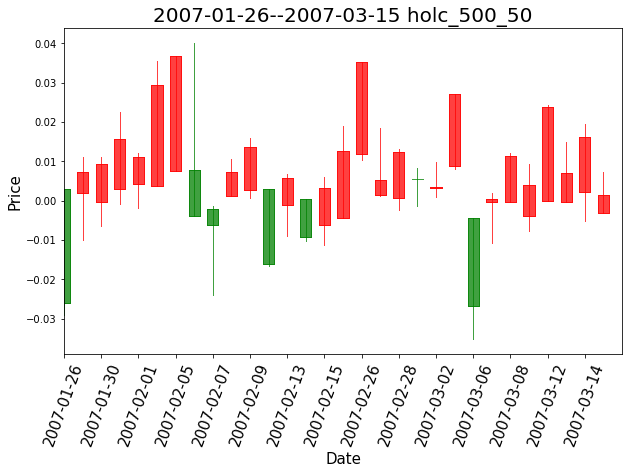

In [ ]:
holc_dict = np.load('KDD/holc_500_50.npy', allow_pickle=True).item()
holc_df = pd.DataFrame(holc_df.head())

window_len = 30
for i in range(0,holc_df.shape[1]-window_len+1):
    start = i
    end = start + window_len

    highs = holc_df.iloc[0, start:end]
    opens = holc_df.iloc[1, start:end]
    lows = holc_df.iloc[2, start:end]
    closes = holc_df.iloc[3, start:end]
    #days = holc_df.shape[1]-start
    ohlc = list(zip(np.arange(0, len(opens)), opens, closes, highs, lows))
    
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    mpf.candlestick2_ochl(ax, opens, closes, highs, lows, width=0.6, colorup='r', colordown='g')

    ax.set_xlim(-1, window_len)
#     ax.set_ylim(-0.05, 0.05)
    ax.set_xticks(range(0, 30, 2))
    ax.set_xticklabels(holc_df.columns[start:start+30:2],rotation=70,fontsize=15)
#     ax.set_yticks(np.arange(-0.05, 0.06, 0.01))
    ax.set_xlabel('Date', fontsize = 15)
    ax.set_ylabel('Price', fontsize = 15)
    ax.set_title(holc_df.columns[start]+'--'+holc_df.columns[start+29]+' holc_500_50',fontsize=20)
    plt.savefig("KDD/image/temp{}.png".format(i))
    plt.show()
